# Reviewer 2. Question 2.

Patients with CPVT frequently experience atrial tachyarrhythmias, which can lead to inappropriate ICD therapy and cerebral infarction. Both events could worsen the prognosis of thsese patients. Are there any hotspots associated with occurrence of atrial tachyarrhythmias?


In [67]:
import json

import pandas as pd
import numpy as np

In [68]:
from analysis.database import get_config

config = get_config()

In [69]:
from pathlib import Path

data_all = pd.read_excel(
    Path.cwd().parent / "data" / f"individual_all_data-{config.version}.xlsx")

columns = [
    "individual_id",
    "Catecholaminergic polymorphic ventricular tachycardia 1",
    "hgvs_string",
    "Atrial tachycardia",
    "exons",
    "structure_domains",
    "publication_id",
    "title",
    "doi"
]

data = data_all[columns].copy()
data = data[
    data["Catecholaminergic polymorphic ventricular tachycardia 1"] == 1]
data = data[data["Atrial tachycardia"] == 1]
data.head()

,individual_id,Catecholaminergic polymorphic ventricular tachycardia 1,hgvs_string,Atrial tachycardia,exons,structure_domains,publication_id,title,doi
3,4,1.0,NM_001035.3:c.14174A>G,1.0,"[99, 100)","[{'structure_id': 19, 'structure_domain': 'Act...",4,Genetic Background of Catecholaminergic Polymo...,10.1253/circj.cj-12-1460
27,28,1.0,NM_001035.3:c.13933T>A,1.0,"[96, 97)","[{'structure_id': 19, 'structure_domain': 'Act...",28,Genetic characterization of familial CPVT afte...,10.1177/1099800409333369
32,33,1.0,NM_001035.3:c.13933T>A,1.0,"[96, 97)","[{'structure_id': 19, 'structure_domain': 'Act...",28,Genetic characterization of familial CPVT afte...,10.1177/1099800409333369
315,318,1.0,NM_001035.3:c.1259G>A,1.0,"[14, 15)","[{'structure_id': 2, 'structure_domain': 'Cyto...",283,"Non-ventricular, Clinical, and Functional Feat...",10.1016/j.rec.2014.04.023
316,319,1.0,NM_001035.3:c.1259G>A,1.0,"[14, 15)","[{'structure_id': 2, 'structure_domain': 'Cyto...",283,"Non-ventricular, Clinical, and Functional Feat...",10.1016/j.rec.2014.04.023


In [70]:
data.shape

(23, 9)

In [71]:
# print how many has nan hgvs strings
print("nan by hgvs", data["hgvs_string"].isna().sum())
print("nan by exons", data["exons"].isna().sum())
print("nan by structure_domains", data["structure_domains"].isna().sum())

nan by hgvs 0
nan by exons 3
nan by structure_domains 2


In [72]:
print("unique hgvs", data["hgvs_string"].unique().shape)

unique hgvs (14,)


In [73]:
data["hgvs_string"].unique()

array(['NM_001035.3:c.14174A>G', 'NM_001035.3:c.13933T>A',
       'NM_001035.3:c.1259G>A', 'NM_001035.3:c.12476A>C',
       'NM_001035.3:c.14251A>C', 'NM_001035.3:c.14600T>C',
       'NM_001035.3:c.13735C>T', 'NM_001035.3:c.5128C>T',
       'NM_001035.3:c.11836G>A', 'NP_001026.2:p.Gly3946Ala',
       'NM_001035.3:c.14553C>A', 'NM_001035.3:c.13892A>T',
       'NM_001035.3:c.12271G>A', 'exon 3 deletion'], dtype=object)

In [74]:
fig_dir = Path.cwd().parent / "figures" / "reviewer2" / "question2"

if not fig_dir.exists():
    fig_dir.mkdir()
    print("Created directory:", fig_dir)
else:
    print("Directory exists:", fig_dir)

Directory exists: /Users/ac4294/dev/2024/cpvt_database_analysis/figures/reviewer2/question2


In [75]:
data["exons_range"] = data["exons"].str.replace("[", "").str.replace(")",
                                                                     "").str.split(
    ", ").astype(object).apply(
    lambda x: [int(i) for i in x] if np.any(pd.notna(x)) else np.nan)
data["exon_start"] = data["exons_range"].apply(
    lambda x: x[0] if np.any(pd.notna(x)) else np.nan)
data["exon_end"] = data["exons_range"].apply(
    lambda x: x[1] - 1 if np.any(pd.notna(x)) else np.nan)
data = data[data["Atrial tachycardia"] == 1]
data = data[data["exon_start"].notna()]

data[[
    "hgvs_string",
    "title",
    "publication_id",
    "exon_start",
    "doi",
]].sort_values("exon_start")

,hgvs_string,title,publication_id,exon_start,doi
322,NM_001035.3:c.1259G>A,"Non-ventricular, Clinical, and Functional Feat...",283,14.0,10.1016/j.rec.2014.04.023
315,NM_001035.3:c.1259G>A,"Non-ventricular, Clinical, and Functional Feat...",283,14.0,10.1016/j.rec.2014.04.023
316,NM_001035.3:c.1259G>A,"Non-ventricular, Clinical, and Functional Feat...",283,14.0,10.1016/j.rec.2014.04.023
317,NM_001035.3:c.1259G>A,"Non-ventricular, Clinical, and Functional Feat...",283,14.0,10.1016/j.rec.2014.04.023
318,NM_001035.3:c.1259G>A,"Non-ventricular, Clinical, and Functional Feat...",283,14.0,10.1016/j.rec.2014.04.023
319,NM_001035.3:c.1259G>A,"Non-ventricular, Clinical, and Functional Feat...",283,14.0,10.1016/j.rec.2014.04.023
320,NM_001035.3:c.1259G>A,"Non-ventricular, Clinical, and Functional Feat...",283,14.0,10.1016/j.rec.2014.04.023
804,NM_001035.3:c.5128C>T,Catecholaminergic polymorphic ventricular tach...,810,37.0,10.1002/joa3.12280
843,NM_001035.3:c.11836G>A,Genetic Background of Catecholaminergic Polymo...,4,88.0,10.1253/circj.cj-12-1460
482,NM_001035.3:c.12476A>C,A novel RyR2 mutation in a 2-year-old baby pre...,486,90.0,10.1016/j.hrthm.2014.04.037


In [76]:
data["hgvs_string"].unique().shape

(12,)

In [77]:
# group by exon start
counts_at = data.groupby("exon_start").size().rename("count").sort_values(
    ascending=False)
counts_at.head()

exon_start
14.0     7
90.0     2
96.0     2
99.0     2
102.0    2
Name: count, dtype: int64

In [78]:
counts_at[14]

7

In [79]:
14 in counts_at

True

In [80]:
counts_all = pd.DataFrame(counts_at)
counts_all["exon_start"] = counts_all.index.astype(int)
counts_all.set_index("exon_start", inplace=True)
counts_all

,count
exon_start,
14,7
90,2
96,2
99,2
102,2
37,1
88,1
94,1
95,1


In [81]:
counts_all["count"].sum()

20

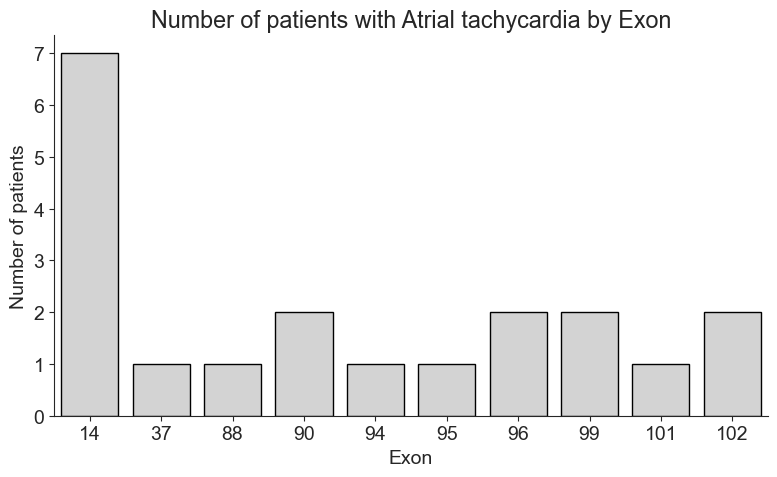

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")

with plt.rc_context({
    'font.size': 14,
    'figure.figsize': (8, 5),
}):
    sns.barplot(x="exon_start", y="count", data=counts_all,
                color='lightgray', edgecolor="black")
    # plt.xticks(rotation=90)
    plt.title("Number of patients with Atrial tachycardia by Exon")
    plt.xlabel("Exon")
    plt.ylabel("Number of patients")

    sns.despine()

    locs, labels = plt.yticks()
    plt.yticks(np.arange(0, int(counts_all["count"].max()) + 1, 1))

    plt.tight_layout()
    plt.savefig(
        fig_dir / "reviewer2.question2.at_individuals_by_exon_location.pdf")
    plt.show()

In [83]:
var_counts = data.drop_duplicates("hgvs_string").groupby(
    "exon_start").size().rename("count").sort_values(ascending=False)

var_counts.head()

exon_start
90.0    2
99.0    2
14.0    1
37.0    1
88.0    1
Name: count, dtype: int64

In [84]:
var_counts.sum()

12

In [85]:
data[data["Atrial tachycardia"] == 1]["hgvs_string"].unique().shape

(12,)

In [86]:
variant_counts = pd.DataFrame(var_counts)
variant_counts["exon_start"] = variant_counts.index.astype(int)
variant_counts.set_index("exon_start", inplace=True)
variant_counts

,count
exon_start,
90,2
99,2
14,1
37,1
88,1
94,1
95,1
96,1
101,1


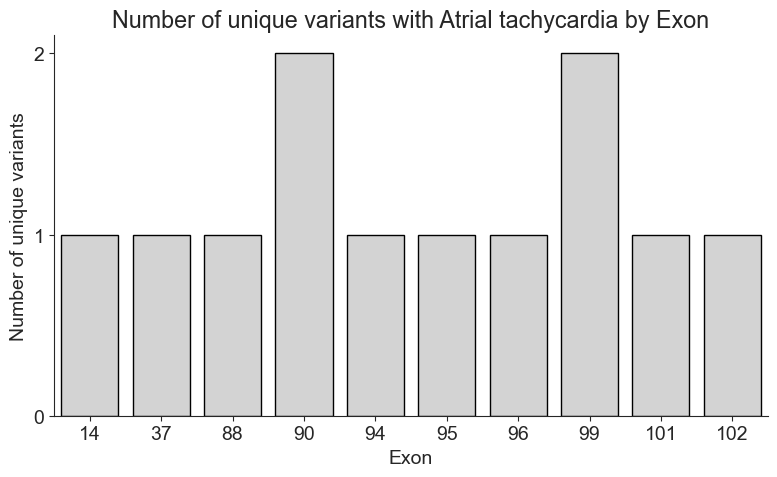

In [87]:
with plt.rc_context({
    'font.size': 14,
    'figure.figsize': (8, 5),
}):
    sns.barplot(x="exon_start", y="count", data=variant_counts,
                color='lightgray', edgecolor="black")
    # plt.xticks(rotation=90)
    plt.title("Number of unique variants with Atrial tachycardia by Exon")
    plt.xlabel("Exon")
    plt.ylabel("Number of unique variants")

    # make the y ticks integers
    locs, labels = plt.yticks()
    plt.yticks(np.arange(0, int(variant_counts["count"].max()) + 1, 1))

    sns.despine()

    plt.tight_layout()
    plt.savefig(
        fig_dir / "reviewer2.question2.at_variants_by_exon_location.pdf")
    plt.show()

In [88]:
sorted(counts_at.index.tolist())

[14.0, 37.0, 88.0, 90.0, 94.0, 95.0, 96.0, 99.0, 101.0, 102.0]

# Structure

In [89]:
data.head()

,individual_id,Catecholaminergic polymorphic ventricular tachycardia 1,hgvs_string,Atrial tachycardia,exons,structure_domains,publication_id,title,doi,exons_range,exon_start,exon_end
3,4,1.0,NM_001035.3:c.14174A>G,1.0,"[99, 100)","[{'structure_id': 19, 'structure_domain': 'Act...",4,Genetic Background of Catecholaminergic Polymo...,10.1253/circj.cj-12-1460,"[99, 100]",99.0,99.0
27,28,1.0,NM_001035.3:c.13933T>A,1.0,"[96, 97)","[{'structure_id': 19, 'structure_domain': 'Act...",28,Genetic characterization of familial CPVT afte...,10.1177/1099800409333369,"[96, 97]",96.0,96.0
32,33,1.0,NM_001035.3:c.13933T>A,1.0,"[96, 97)","[{'structure_id': 19, 'structure_domain': 'Act...",28,Genetic characterization of familial CPVT afte...,10.1177/1099800409333369,"[96, 97]",96.0,96.0
315,318,1.0,NM_001035.3:c.1259G>A,1.0,"[14, 15)","[{'structure_id': 2, 'structure_domain': 'Cyto...",283,"Non-ventricular, Clinical, and Functional Feat...",10.1016/j.rec.2014.04.023,"[14, 15]",14.0,14.0
316,319,1.0,NM_001035.3:c.1259G>A,1.0,"[14, 15)","[{'structure_id': 2, 'structure_domain': 'Cyto...",283,"Non-ventricular, Clinical, and Functional Feat...",10.1016/j.rec.2014.04.023,"[14, 15]",14.0,14.0


In [90]:
# domains
domains_df = pd.read_csv("../analysis/data_commit/ryr2_subdomains.csv")
domains_df

,domains,subdomains,subdomain_precedence
0,NTD,NTD-A,NaN
1,SPRY,NTD-B,NaN
2,JSol,NSol,NaN
3,BSol,SPRY1,NaN
4,SCLP,SPRY2,NaN
5,CSol,SPRY3,NaN
6,TaF,RY1&2,NaN
7,TM,JSol,NaN
8,CTD,BSol1,NaN
9,NaN,BSol2,NaN


In [91]:
def find_domain(structure_domain: list[dict], domains: set[str]):
    if not structure_domain:
        return None

    in_domains = []
    for d in structure_domain:
        # example value: [{'structure_id': 27, 'structure_domain': 'C-terminal domain ', 'structure_domain_symbol': 'CTD'}, {'structure_id': 19, 'structure_domain': 'Activation core and channel', 'structure_domain_symbol': None}]
        domain_symbol = d["structure_domain_symbol"]

        if domain_symbol is None or pd.isna(domain_symbol):
            continue

        if domain_symbol in domains:
            in_domains.append(domain_symbol)

    if len(in_domains) == 0:
        print(
            f"No domains found: {structure_domain}. Setting to full name if structure_domain is length 1."
        )
        return return_first_full_domain_name(structure_domain)

    if len(in_domains) == 1:
        return in_domains[0]

    raise ValueError(f"Multiple domains found: {in_domains}")


def find_subdomain(
        structure_domain: list[dict], subdomain_with_precedence: dict[str, bool]
):
    if not structure_domain:
        return None

    in_subdomains = []
    for d in structure_domain:

        domain_symbol = d["structure_domain_symbol"]

        if domain_symbol is None or pd.isna(domain_symbol):
            continue

        if domain_symbol in subdomain_with_precedence:
            in_subdomains.append(domain_symbol)

    if len(in_subdomains) == 0:
        print(
            f"No subdomains found: {structure_domain}. Setting to full name if structure_domain is length 1."
        )

        return return_first_full_domain_name(structure_domain)

    if len(in_subdomains) == 1:
        return in_subdomains[0]

    # make sure only 1 has precedence
    with_precedence = [d for d in in_subdomains if subdomain_with_precedence[d]]
    if len(with_precedence) == 1:
        return with_precedence[0]

    raise ValueError(f"Multiple subdomains found: {in_subdomains}")


def return_first_full_domain_name(structure_domain: list[dict]):
    if not structure_domain:
        return None

    if len(structure_domain) == 1:
        return structure_domain[0]["structure_domain"]

    print("WARNING: Multiple domains found.")
    return None

In [92]:
at_by_domain = data_all[
    [
        "individual_id",
        "hgvs_string",
        "structure_domains",
        "Atrial tachycardia",
        "Catecholaminergic polymorphic ventricular tachycardia 1",
    ]
].copy()

at_by_domain.drop_duplicates("individual_id", inplace=True)

at_by_domain = at_by_domain[at_by_domain[
                                "Catecholaminergic polymorphic ventricular tachycardia 1"] == 1]
at_by_domain = at_by_domain[at_by_domain["Atrial tachycardia"] == 1]
at_by_domain = at_by_domain[at_by_domain["structure_domains"].notna()]
at_by_domain["structure_domains"] = at_by_domain[
    "structure_domains"].str.replace("'", '"').str.replace("None", "null")


def foo(val):
    try:
        return json.loads(val)
    except Exception as e:
        print(val)
        raise e


at_by_domain["struct"] = at_by_domain["structure_domains"].apply(
    foo
)

domains = set(d.strip() for d in domains_df["domains"].values if pd.notna(d))

at_by_domain["domain"] = at_by_domain["struct"].apply(
    lambda x: find_domain(
        x, set(d.strip() for d in domains_df["domains"].values if pd.notna(d))
    )
)

subdomain_to_precedence = {
    d.strip(): p if pd.notna(p) else False
    for d, p in zip(
        domains_df["subdomains"].values,
        domains_df["subdomain_precedence"].values,
    )
    if pd.notna(d)
}

at_by_domain["subdomain"] = at_by_domain["struct"].apply(
    lambda x: find_subdomain(
        x,
        subdomain_to_precedence,
    )
)

at_by_domain.head()

#
# for s in at_by_domain["struct"][:10]:
#     for v in s:
#         print(v)
#
#     print("----")

No subdomains found: [{'structure_id': 19, 'structure_domain': 'Activation core and channel', 'structure_domain_symbol': None}, {'structure_id': 20, 'structure_domain': 'Core solenoid', 'structure_domain_symbol': 'CSol'}]. Setting to full name if structure_domain is length 1.
No subdomains found: [{'structure_id': 19, 'structure_domain': 'Activation core and channel', 'structure_domain_symbol': None}, {'structure_id': 20, 'structure_domain': 'Core solenoid', 'structure_domain_symbol': 'CSol'}]. Setting to full name if structure_domain is length 1.
No subdomains found: [{'structure_id': 19, 'structure_domain': 'Activation core and channel', 'structure_domain_symbol': None}, {'structure_id': 20, 'structure_domain': 'Core solenoid', 'structure_domain_symbol': 'CSol'}]. Setting to full name if structure_domain is length 1.


,individual_id,hgvs_string,structure_domains,Atrial tachycardia,Catecholaminergic polymorphic ventricular tachycardia 1,struct,domain,subdomain
3,4,NM_001035.3:c.14174A>G,"[{""structure_id"": 19, ""structure_domain"": ""Act...",1.0,1.0,"[{'structure_id': 19, 'structure_domain': 'Act...",TM,pVSD
27,28,NM_001035.3:c.13933T>A,"[{""structure_id"": 19, ""structure_domain"": ""Act...",1.0,1.0,"[{'structure_id': 19, 'structure_domain': 'Act...",TM,pVSD
32,33,NM_001035.3:c.13933T>A,"[{""structure_id"": 19, ""structure_domain"": ""Act...",1.0,1.0,"[{'structure_id': 19, 'structure_domain': 'Act...",TM,pVSD
315,318,NM_001035.3:c.1259G>A,"[{""structure_id"": 2, ""structure_domain"": ""Cyto...",1.0,1.0,"[{'structure_id': 2, 'structure_domain': 'Cyto...",NTD,NSol
316,319,NM_001035.3:c.1259G>A,"[{""structure_id"": 2, ""structure_domain"": ""Cyto...",1.0,1.0,"[{'structure_id': 2, 'structure_domain': 'Cyto...",NTD,NSol


In [93]:
at_by_domain["domain"].value_counts()

domain
TM      9
NTD     7
CSol    3
TaF     1
JSol    1
Name: count, dtype: int64

In [94]:
at_by_domain["domain"].value_counts().sum()

21

In [95]:
at_by_domain["hgvs_string"].unique().shape

(13,)

In [96]:
domain_plot = domains_df.copy()
domain_plot = domain_plot.join(
    at_by_domain["domain"].value_counts().rename("count_on_domain"),
    on="domains",
)
domain_plot = domain_plot.join(
    at_by_domain["subdomain"].value_counts().rename("count_on_subdomain"),
    on="subdomains",
)
domain_plot = domain_plot.join(
    at_by_domain.drop_duplicates("hgvs_string")["domain"].value_counts().rename(
        "unique_hgvs_count_on_domain"),
    on="domains",
)

domain_plot["count_on_domain"] = domain_plot["count_on_domain"].fillna(0)
domain_plot["count_on_subdomain"] = domain_plot["count_on_subdomain"].fillna(0)
domain_plot["unique_hgvs_count_on_domain"] = domain_plot[
    "unique_hgvs_count_on_domain"].fillna(0)
domain_plot

,domains,subdomains,subdomain_precedence,count_on_domain,count_on_subdomain,unique_hgvs_count_on_domain
0,NTD,NTD-A,NaN,7.0,0.0,1.0
1,SPRY,NTD-B,NaN,0.0,0.0,0.0
2,JSol,NSol,NaN,1.0,7.0,1.0
3,BSol,SPRY1,NaN,0.0,0.0,0.0
4,SCLP,SPRY2,NaN,0.0,0.0,0.0
5,CSol,SPRY3,NaN,3.0,0.0,3.0
6,TaF,RY1&2,NaN,0.0,0.0,0.0
7,TM,JSol,NaN,9.0,1.0,7.0
8,CTD,BSol1,NaN,0.0,0.0,0.0
9,NaN,BSol2,NaN,0.0,0.0,0.0


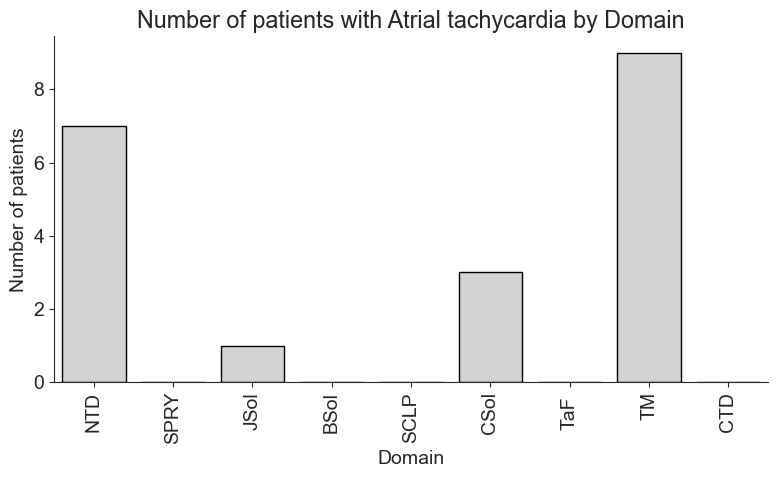

In [97]:
# bar chart

with plt.rc_context({
    'font.size': 14,
    'figure.figsize': (8, 5),
}):
    sns.barplot(x="domains", y="count_on_domain", data=domain_plot,
                color="lightgray", edgecolor="black")
    plt.title("Number of patients with Atrial tachycardia by Domain")
    plt.xlabel("Domain")
    plt.ylabel("Number of patients")
    plt.xticks(rotation=90)
    sns.despine()

    plt.tight_layout()

    plt.savefig(fig_dir / "reviewer2.question2.at_individuals_by_domain.pdf")
    plt.show()

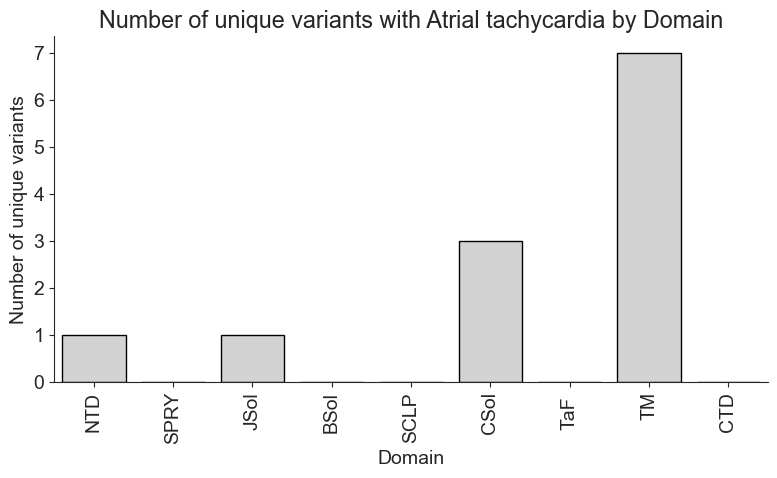

In [98]:
with plt.rc_context({
    'font.size': 14,
    'figure.figsize': (8, 5),
}):
    sns.barplot(x="domains", y="unique_hgvs_count_on_domain", data=domain_plot,
                color="lightgray", edgecolor="black")
    plt.title("Number of unique variants with Atrial tachycardia by Domain")
    plt.xlabel("Domain")
    plt.ylabel("Number of unique variants")
    plt.xticks(rotation=90)

    sns.despine()
    plt.tight_layout()

    plt.savefig(fig_dir / "reviewer2.question2.at_variants_by_domain.pdf")
    plt.show()

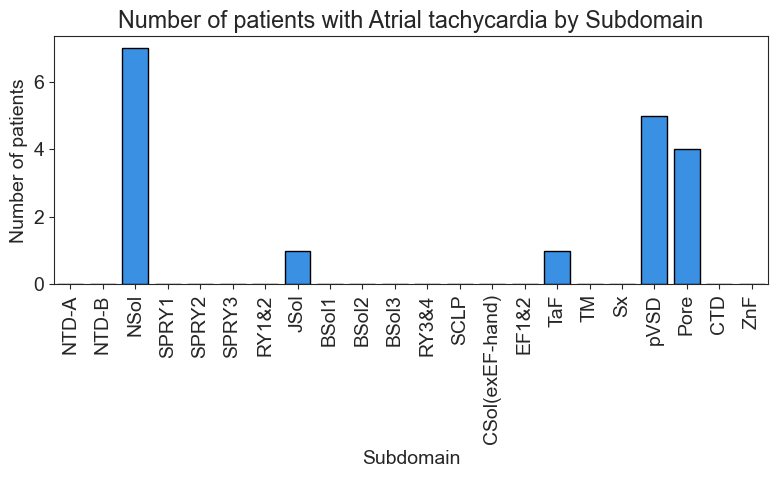

In [99]:
with plt.rc_context({
    'font.size': 14,
    'figure.figsize': (8, 5),
}):
    sns.barplot(x="subdomains", y="count_on_subdomain", data=domain_plot,
                color="dodgerblue", edgecolor="black")
    plt.title("Number of patients with Atrial tachycardia by Subdomain")
    plt.xlabel("Subdomain")
    plt.ylabel("Number of patients")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(
        fig_dir / "reviewer2.question2.at_individuals_by_sub_domain.pdf")
    plt.show()